## Upgrade Keras to the Latest Version

In the following code cell, we use the `pip install` command to upgrade the Keras library to the latest version. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Upgrading Keras ensures that you have access to the latest features, improvements, and bug fixes.

In [2]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


## Importing Necessary Libraries

In this section, we import the libraries required for data manipulation, visualization, and deep learning using Keras.

- **pandas (pd):** Used for data manipulation and analysis.
- **pathlib.Path:** A module for working with file paths and directories.
- **matplotlib.pyplot (plt):** A plotting library for creating visualizations.
- **seaborn (sns):** Built on top of Matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
- **numpy (np):** A powerful library for numerical operations in Python.
- **zipfile.ZipFile:** Provides tools to create, read, write, append, and list a ZIP file.

### Deep Learning Libraries

- **keras:** A high-level neural networks API.
- **keras.layers:** Module containing core layers for building neural networks.
- **keras.ops:** Module providing operations for building neural networks.

This setup is crucial for tasks involving data processing, visualization, and the implementation of deep learning models using Keras.

Make sure to run this cell before proceeding with any data analysis or deep learning tasks.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from zipfile import ZipFile

import keras
from keras import layers
from keras import ops

## Reading and Displaying Customer Details Data

In this code snippet, we load customer details data from a CSV file using the pandas library and display basic information about the dataset.

In [2]:
user_df = pd.read_csv('./customer_details.csv')
print(user_df.shape)
user_df.head()

(610, 2)


,user_id,user_name
0,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,S.ARUMUGAM
1,AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn
2,AE3MQNNHHLUHXURL5S7IAR7JTGNQ,Durai Vignesh
3,AFV7ZA733ZLME4KNLZPMPCBUNPPA,Aman
4,AEHQYGI5L4FFALBMC5XMT5KXSZCA,Vivek


In [3]:
product_df = pd.read_csv('./product_details.csv')
print(product_df.shape)
product_df.head()

(1000, 11)


,product_id,product_name,category_1,category_2,about_product,img_link,product_link,discounted_price,actual_price,difference_price,discount_percentage
0,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers & Accessories,Accessories & Peripherals,"Compatible with all Type C enabled devices, be...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,199.0,349.0,150.0,0.43
1,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers & Accessories,Accessories & Peripherals,【 Fast Charger& Data Sync】-With built-in safet...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,199.0,1899.0,1700.0,0.90
2,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers & Accessories,Accessories & Peripherals,The boAt Deuce USB 300 2 in 1 cable is compati...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,329.0,699.0,370.0,0.53
3,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers & Accessories,Accessories & Peripherals,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,154.0,399.0,245.0,0.61
4,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers & Accessories,Accessories & Peripherals,Fast Charging & Data Sync: Solero TB301 Type-C...,https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...,149.0,1000.0,851.0,0.85


In [4]:
rating_df = pd.read_csv('./rating_history.csv')
print(rating_df.shape)
rating_df.head()

(61256, 5)


,user_id,product_id,rating,rating_score,timestamp
0,AFWTGD4FCS2E2U2TDCOEOGP2FWEA,B097R3XH9R,4.0,Above Average,964982703
1,AGPQHMB6XWAURLOJA57DPCU4HQ7A,B097R3XH9R,4.0,Above Average,847434962
2,AFC4X5UHL2LN4PBS2TWOMIZ2GHAQ,B097R3XH9R,4.5,Above Average,1106635946
3,AFK6D62HRZSHP5W3DE5QGYUYJQEA,B097R3XH9R,2.5,Below Average,1510577970
4,AHQ7LIIQZN6O7YA3EYZ7SV2RIYFQ,B097R3XH9R,4.5,Above Average,1305696483


## Extracting and Analyzing Product Categories

In this section, we focus on extracting specific columns from the `product_df` DataFrame, renaming them, and creating a pivot table for analysis.

In [5]:
main_sub = product_df[['product_id', 'category_1', 'category_2']]
main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})
main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')
main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            226
                        Components                                             4
                        External Devices & Data Storage                       15
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    22
                        Printers, Inks & Accessories                           5
Electronics             Accessories                                            6
                        Cameras & Photography                                 14
                        General Purpose Batteries & Battery Chargers          13
                        Headphones, Earbuds & Accessories                     42
                        Home Audio                                            13
                        Home Theater, TV & Video                             108
                        Mobiles & Accessories                                 84
                        Power Accessories                                      1
                        Wearable Technology                                   37
Home & Kitchen          Craft Materials                                        6
                        Heating, Cooling & Air Quality                        94
                        Home Storage & Organization                           14
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            261
Home Improvement        Electrical                                             1
Musical Instruments     Microphones                                            1
Office Products         Office Electronics                                     4
                        Office Paper Products                                 23
Toys & Games            Arts & Crafts                                          1

## Visualizing Most Frequent Product Categories

In this section, we analyze and visualize the most frequent product categories, both in the main category and sub-category.

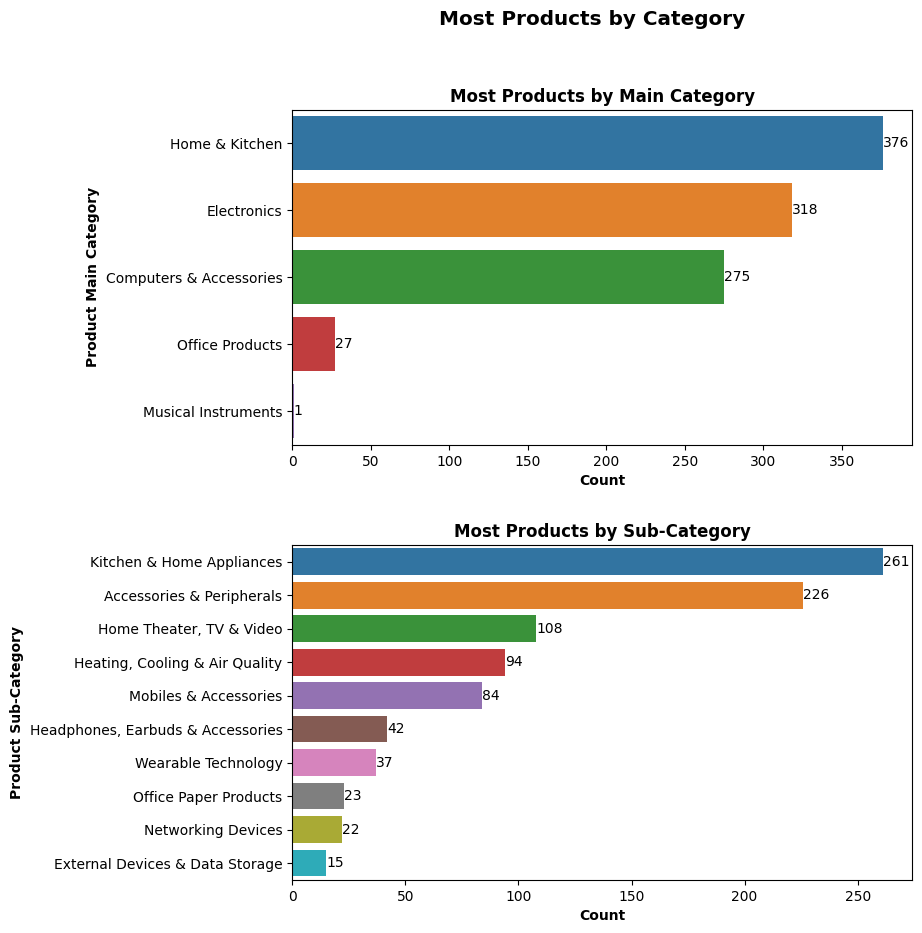

In [6]:
most_main_items = product_df['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')
most_sub_items = product_df['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Products by Category', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

## Analyzing Top 5 Most Expensive Products After Discount

In this section, we analyze and visualize the top 5 most expensive products after applying discounts from the `product_df` DataFrame.

<function matplotlib.pyplot.show(close=None, block=None)>

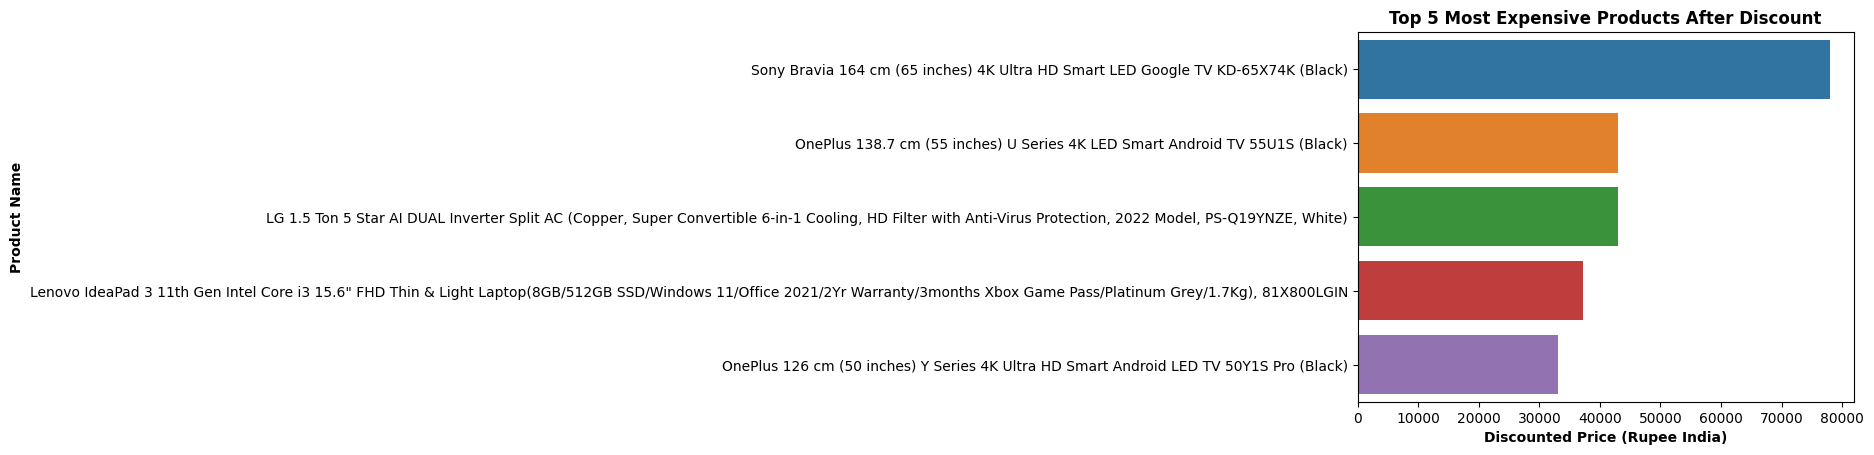

In [7]:
disc_exp = sns.barplot(data=product_df.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')
disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')
plt.show

## Analyzing Top 5 Cheapest Products After Discount

In this section, we analyze and visualize the top 5 cheapest products after applying discounts from the `product_df` DataFrame.

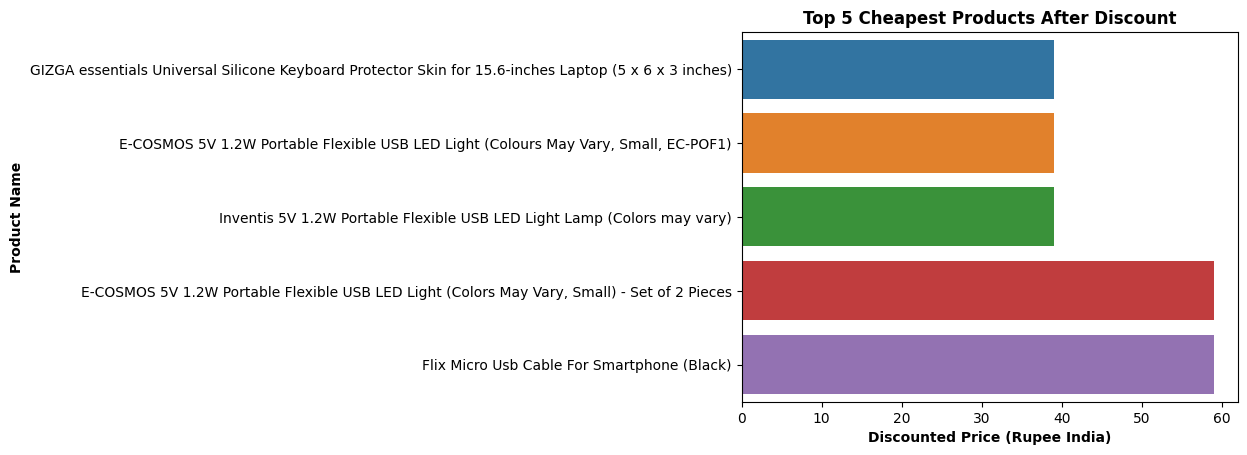

In [8]:
disc_cheap = sns.barplot(data=product_df.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

## Analyzing Top 5 Products with the Largest Price Difference

In this section, we analyze and visualize the top 5 products with the largest price differences from the `product_df` DataFrame.

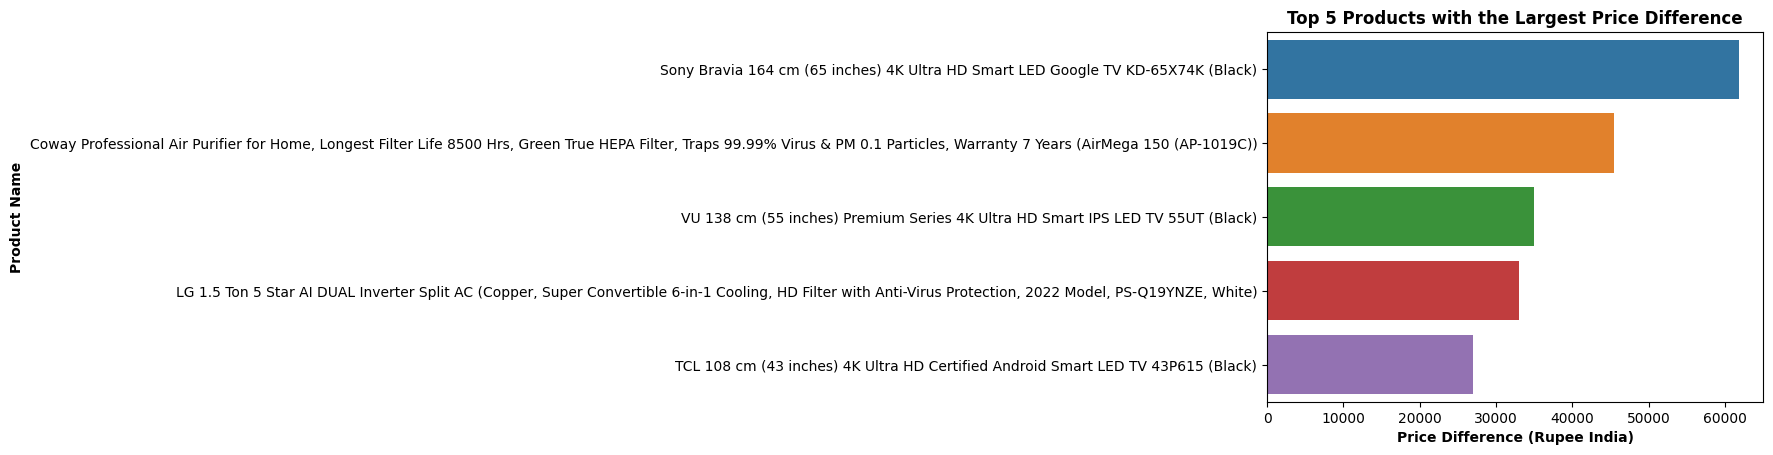

In [9]:
dif_price_large = sns.barplot(data=product_df.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

## Analyzing Rating Distribution

In this section, we analyze and visualize the distribution of ratings from the `rating_df` DataFrame.

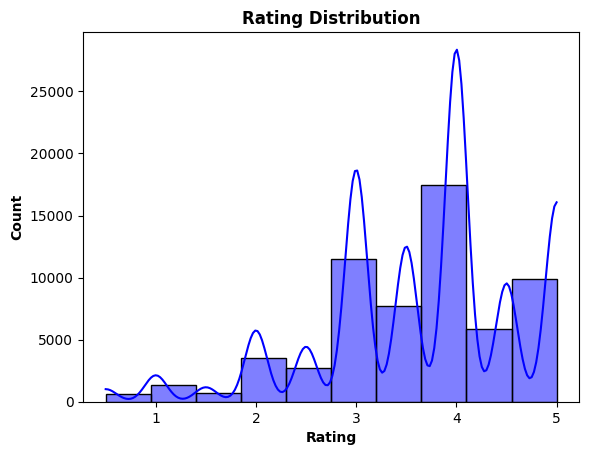

In [10]:
rating_dist = sns.histplot(data=rating_df, x='rating', bins=10, kde=True, color='blue')
rating_dist.set_xlabel('Rating', fontweight='bold')
rating_dist.set_ylabel('Count', fontweight='bold')
rating_dist.set_title('Rating Distribution', fontweight='bold')

plt.show()

## Analyzing Rating Distribution by Product Main Category

In this section, we analyze and visualize the distribution of ratings across different main product categories from the `rating_df` and `product_df` DataFrames.

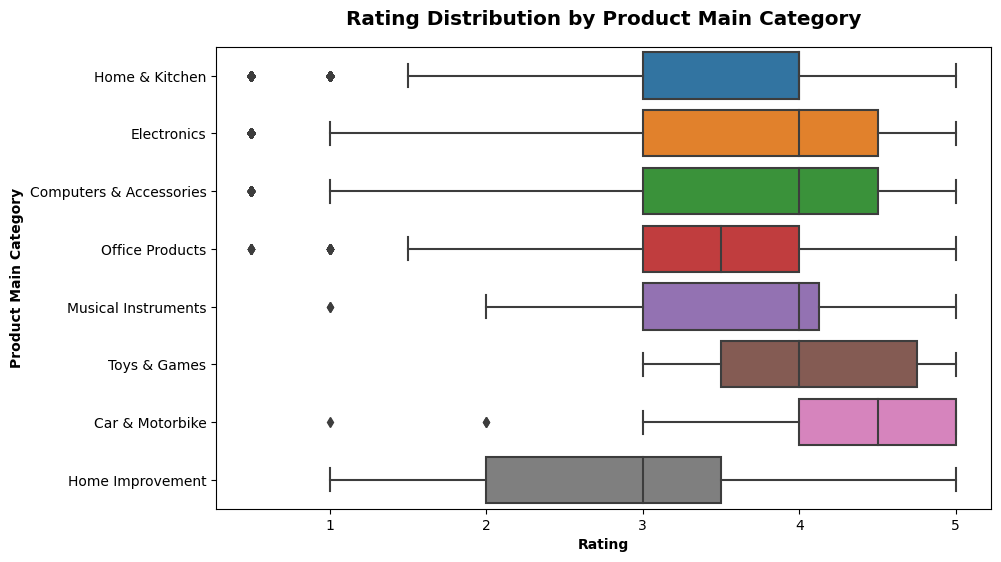

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=pd.merge(rating_df, product_df, how='left', on='product_id'), x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Analyzing Rating Counts by Main Category and Rating Category

In this section, we analyze the counts of ratings based on main product categories ('category_1') and rating categories from the `rating_df` and `product_df` DataFrames.

In [12]:
rate_main_cat = pd.merge(rating_df, product_df, how='left', on='product_id').groupby(['category_1', 'rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Count')
rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})
rate_main_cat

,Main Category,Rating Category,Count
0,Car & Motorbike,Above Average,42
1,Car & Motorbike,Average,16
2,Car & Motorbike,Below Average,2
3,Car & Motorbike,Excellent,36
4,Car & Motorbike,Poor,1
5,Computers & Accessories,Above Average,6272
6,Computers & Accessories,Average,5288
7,Computers & Accessories,Below Average,1729
8,Computers & Accessories,Excellent,2674
9,Computers & Accessories,Poor,690


## Analyzing Rating Distribution by Product Sub-Category

In this section, we analyze and visualize the distribution of ratings across different sub-product categories from the `rating_df` and `product_df` DataFrames.

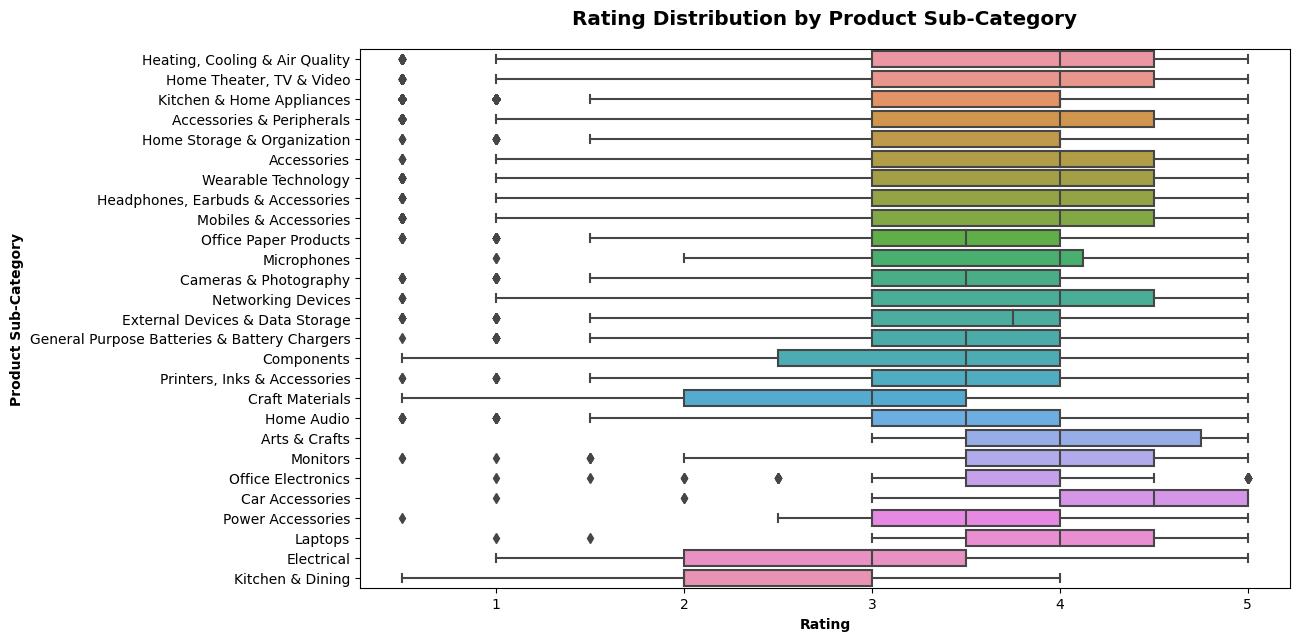

In [13]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(ax=ax, data=pd.merge(rating_df, product_df, how='left', on='product_id'), x='rating', y='category_2')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Analyzing the Distribution of Rating Categories

In this section, we analyze and visualize the distribution of rating categories for all products in the `rating_df` DataFrame.

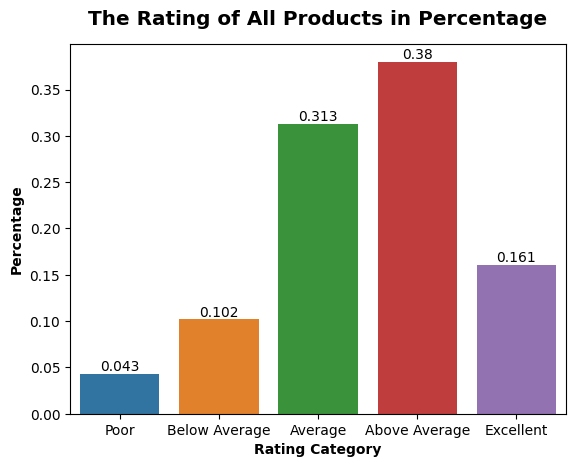

In [14]:
rating_ordered = ['Poor', 'Below Average', 'Average', 'Above Average', 'Excellent']
rating_count = rating_df['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')
rating_count['counts'] = rating_count['counts'].round(3)
rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)
rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)
rating_count_plot.bar_label(rating_count_plot.containers[0])
plt.show()

## Calculating Summary Statistics for Ratings by Category

In this section, we calculate and organize summary statistics for ratings, including the 25th percentile, median, mean, and 75th percentile, grouped by main and sub-categories.

In [15]:
def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = pd.merge(rating_df, product_df, how='left', on='product_id').pivot_table(values=['rating'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))
rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, index={'category_1': 'Main Category', 'category_2': 'Sub Category'})
rating_pivot

p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                                 4.0   
Computers & Accessories Accessories & Peripherals                       3.0   
                        Components                                      2.5   
                        External Devices & Data Storage                 3.0   
                        Laptops                                         3.5   
                        Monitors                                        3.5   
                        Networking Devices                              3.0   
                        Printers, Inks & Accessories                    3.0   
Electronics             Accessories                                     3.0   
                        Cameras & Photography                           3.0   
                        General Purpose Batteries & Battery Chargers    3.0   
                        Headphones, Earbuds & Accessories               3.0   
                        Home Audio                                      3.0   
                        Home Theater, TV & Video                        3.0   
                        Mobiles & Accessories                           3.0   
                        Power Accessories                               3.0   
                        Wearable Technology                             3.0   
Home & Kitchen          Craft Materials                                 2.0   
                        Heating, Cooling & Air Quality                  3.0   
                        Home Storage & Organization                     3.0   
                        Kitchen & Dining                                2.0   
                        Kitchen & Home Appliances                       3.0   
Home Improvement        Electrical                                      2.0   
Musical Instruments     Microphones                                     3.0   
Office Products         Office Electronics                              3.5   
                        Office Paper Products                           3.0   
Toys & Games            Arts & Crafts                                   3.5   

                                                                     Median  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                                4.50   
Computers & Accessories Accessories & Peripherals                      4.00   
                        Components                                     3.50   
                        External Devices & Data Storage                3.75   
                        Laptops                                        4.00   
                        Monitors                                       4.00   
                        Networking Devices                             4.00   
                        Printers, Inks & Accessories                   3.50   
Electronics             Accessories                                    4.00   
                        Cameras & Photography                          3.50   
                        General Purpose Batteries & Battery Chargers   3.50   
                        Headphones, Earbuds & Accessories              4.00   
                        Home Audio                                     3.50   
                        Home Theater, TV & Video                       4.00   
                        Mobiles & Accessories                          4.00   
                        Power Accessories                              3.50   
                        Wearable Technology                            4.00   
Home & Kitchen          Craft Materials                                3.00   
                        Heating, Cooling &

## Analyzing Top 10 Active Reviewers

In this section, we analyze and visualize the top 10 active reviewers based on the frequency of ratings they have given from the `rating_df` and `user_df` DataFrames.

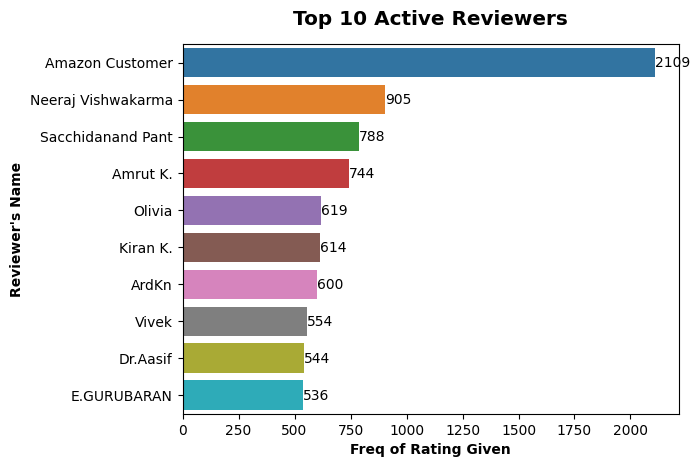

In [16]:
top_reviewer = pd.merge(rating_df, user_df, how='left', on='user_id')['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Freq of Rating Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Analyzing Actual Price and Discounted Price Distribution

In this section, we analyze and visualize the distribution of actual prices and discounted prices from the `product_df` DataFrame.

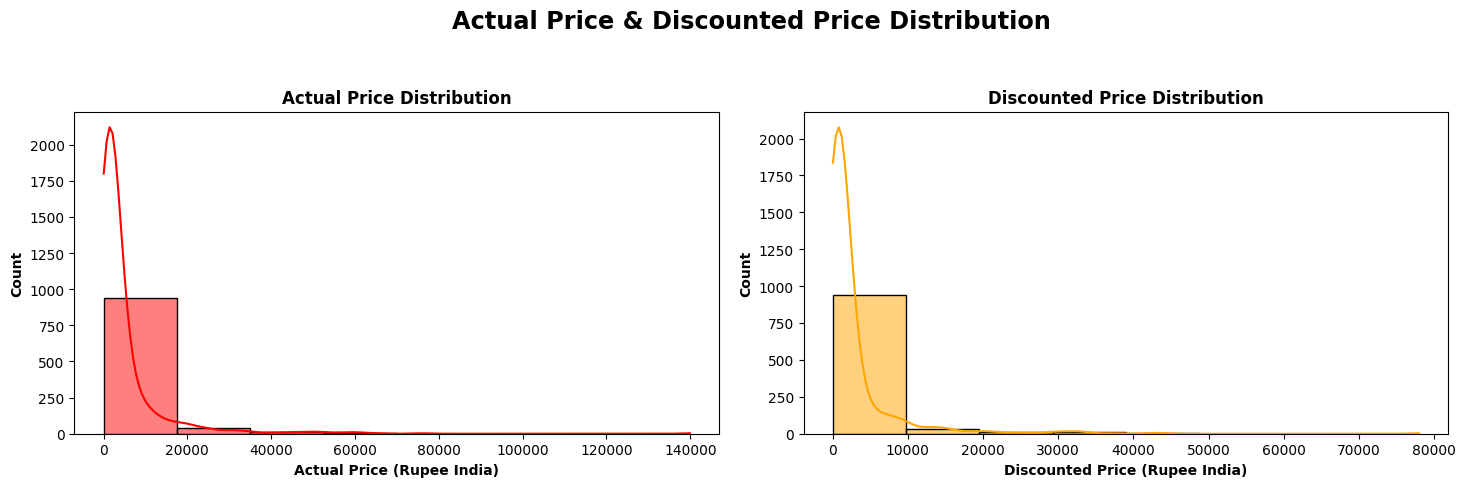

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=product_df, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=product_df, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

## Analyzing Discount Percentage Distribution

In this section, we analyze and visualize the distribution of discount percentages from the `product_df` DataFrame.

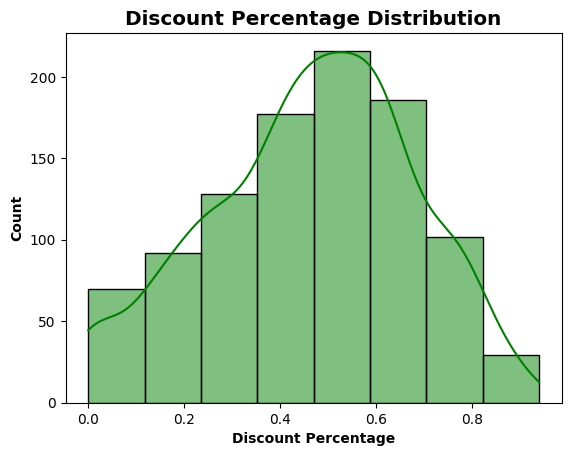

In [18]:
disc_hist = sns.histplot(data=product_df, x='discount_percentage', bins=8, kde=True, color='green')

disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

## Analyzing Discount Percentage Range by Product Main Category

In this section, we analyze and visualize the range of discount percentages across different main product categories from the `product_df` DataFrame.

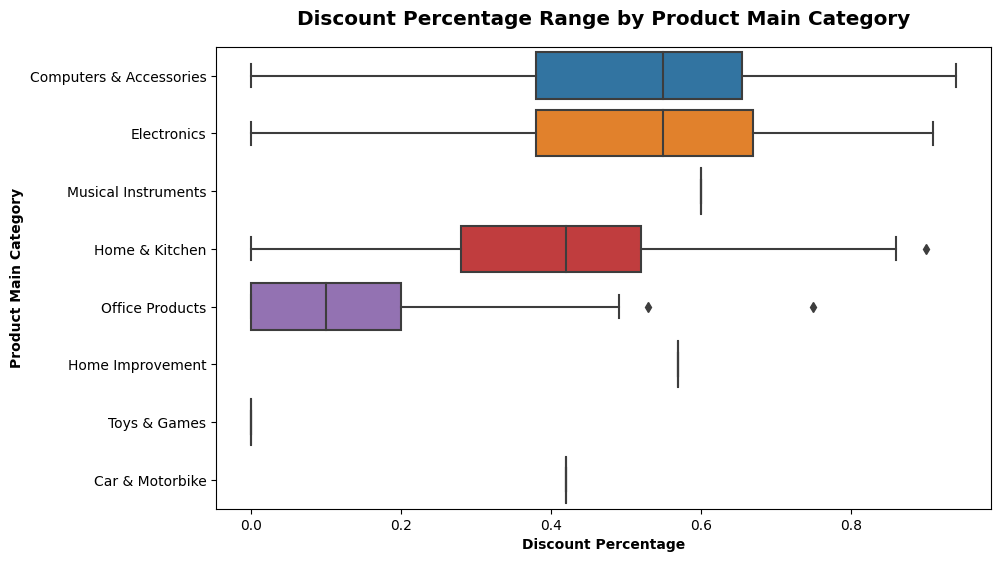

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=product_df, x='discount_percentage', y='category_1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Analyzing Discount Range by Product Sub-Category

In this section, we analyze and visualize the range of discount percentages across different sub-product categories from the `product_df` DataFrame.

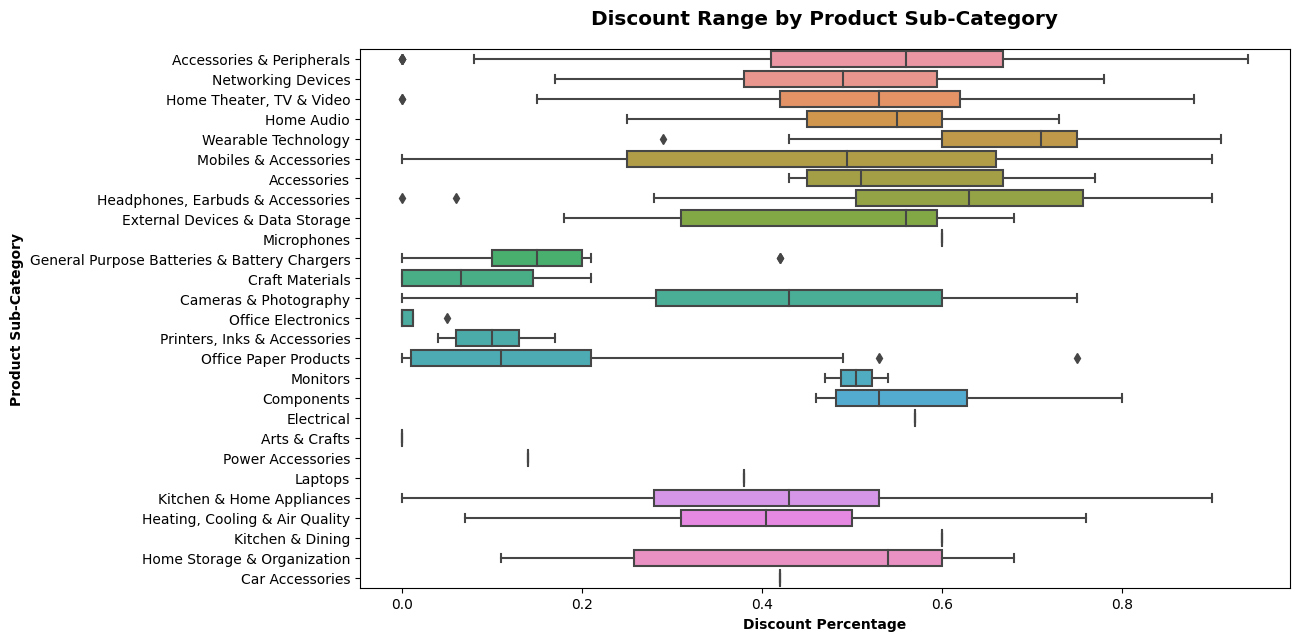

In [20]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=product_df, x='discount_percentage', y='category_2')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Analyzing Price Range by Product Main Category

In this section, we analyze and visualize the range of actual prices and discounted prices across different main product categories from the `product_df` DataFrame.

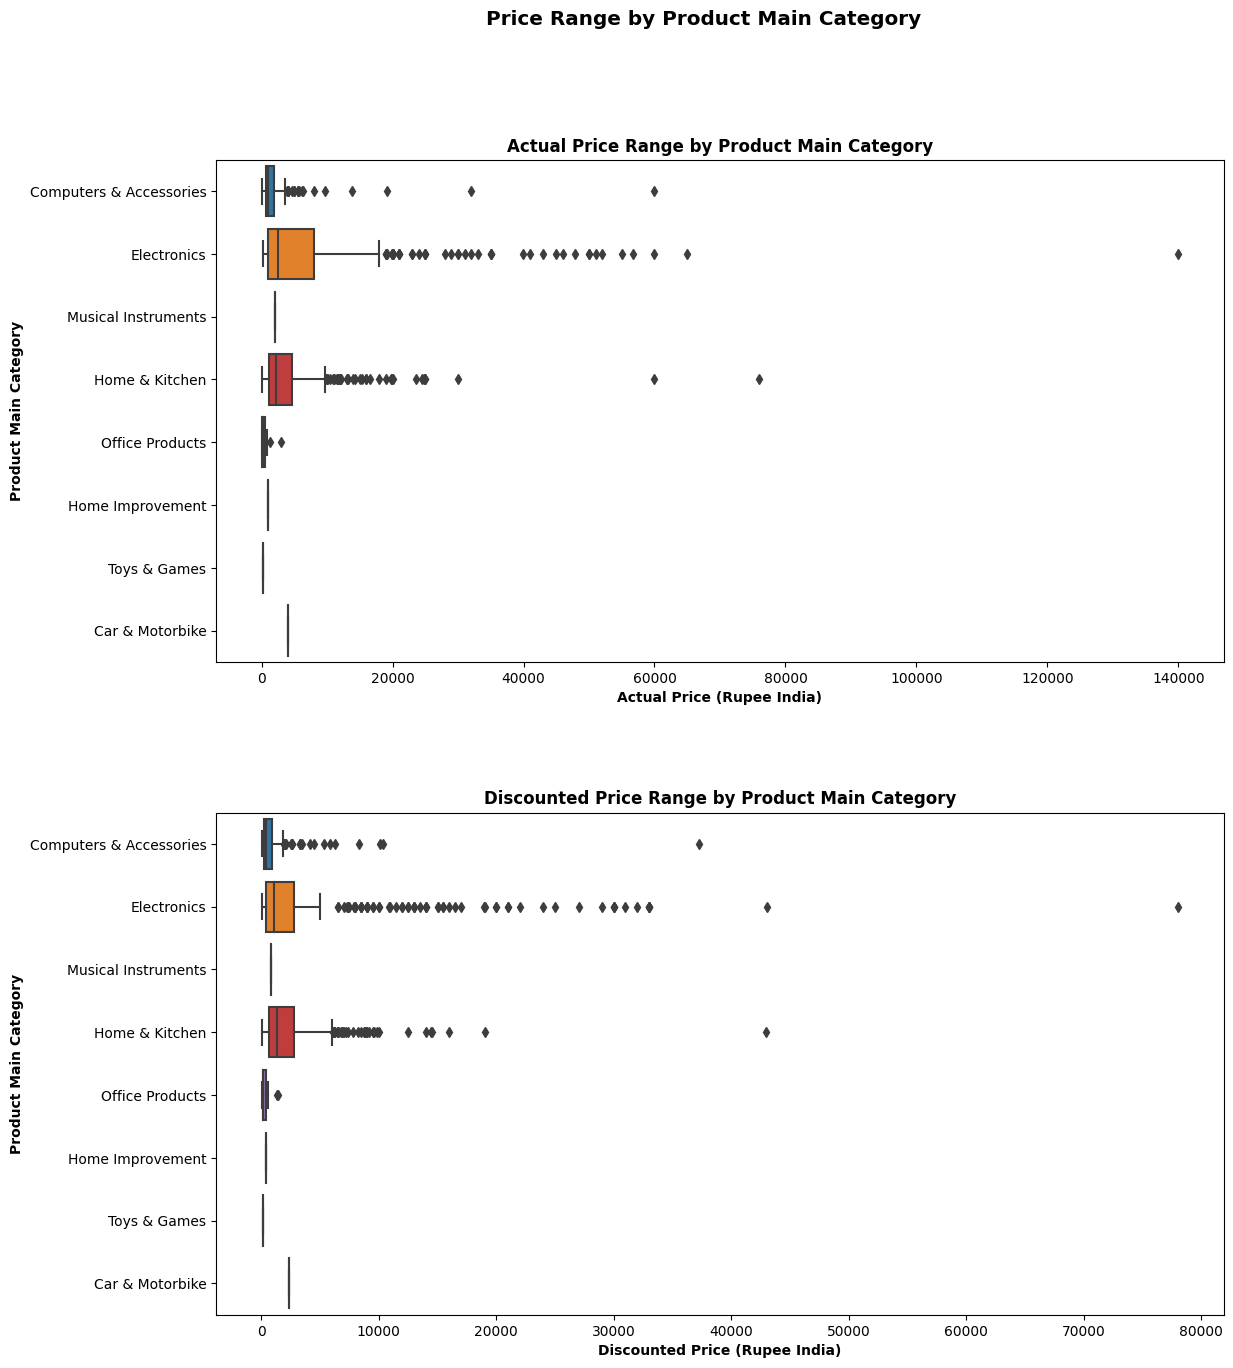

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.boxplot(ax=ax[0], data=product_df, x='actual_price', y='category_1')
sns.boxplot(ax=ax[1], data=product_df, x='discounted_price', y='category_1')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

## Analyzing Price Range by Product Sub-Category

In this section, we analyze and visualize the range of actual prices and discounted prices across different sub-product categories from the `product_df` DataFrame.

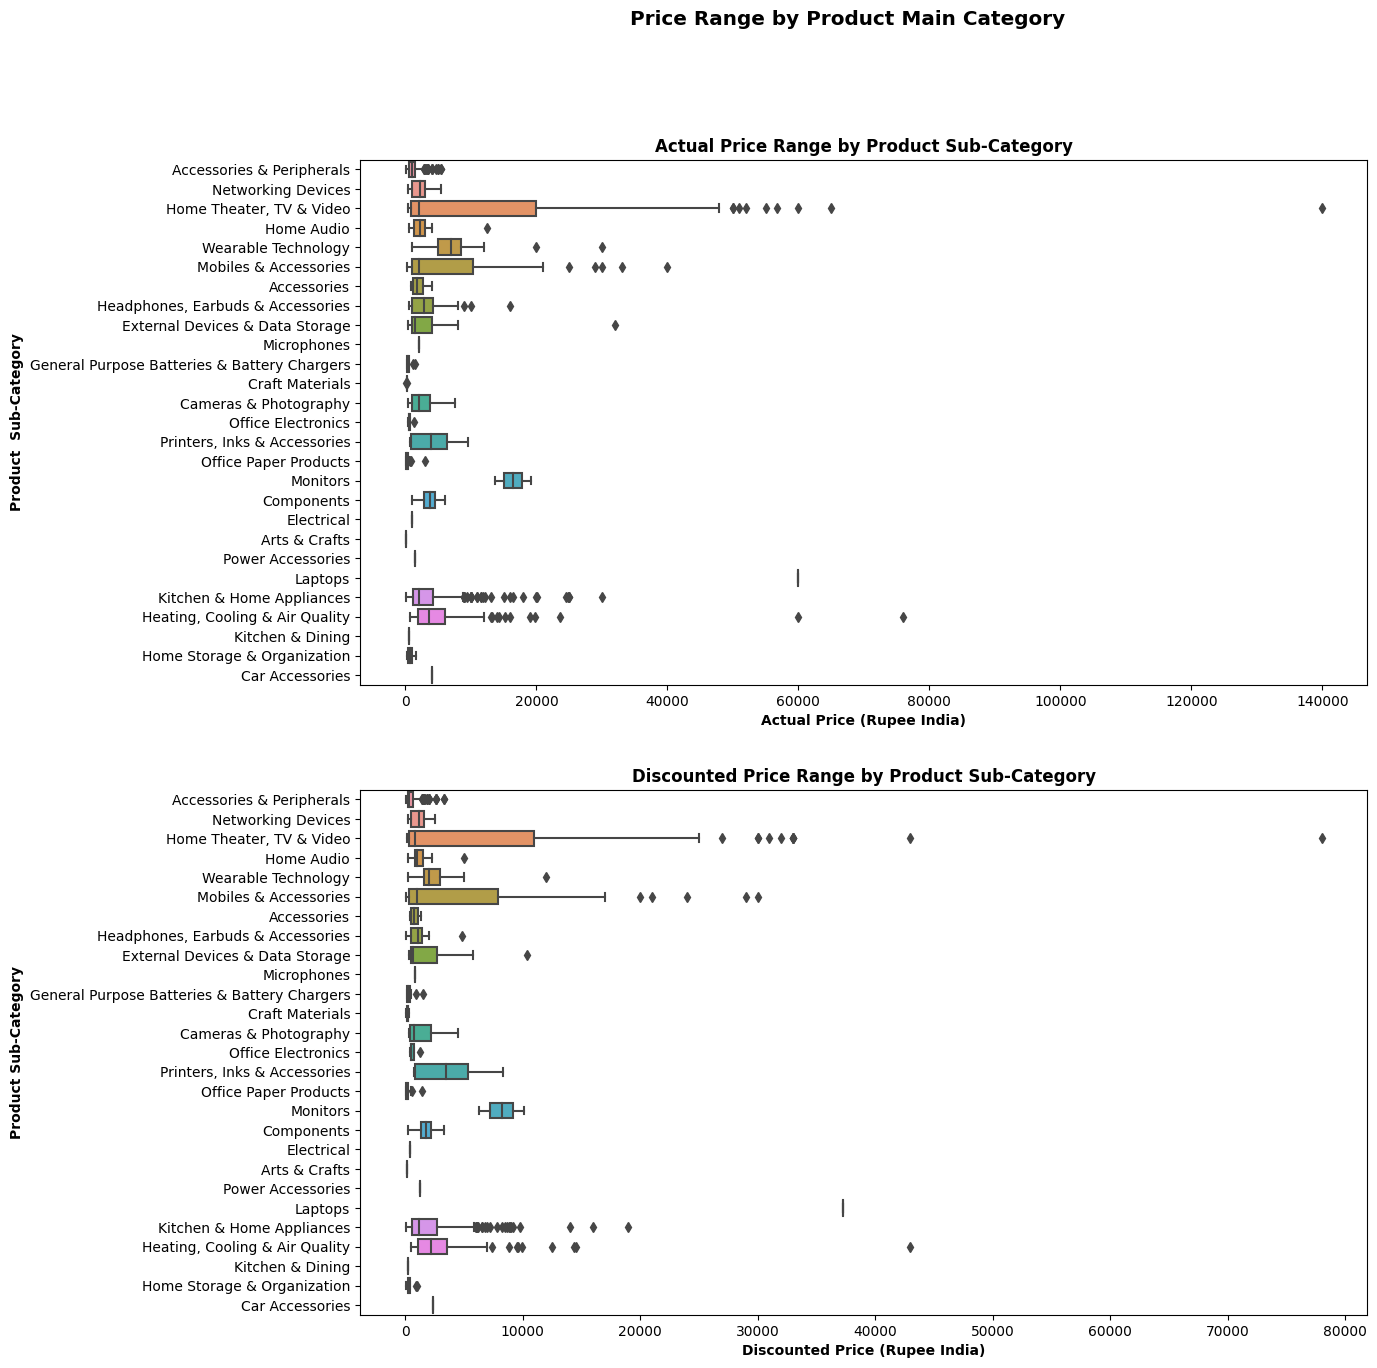

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(13, 15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.boxplot(ax=ax[0], data=product_df, x='actual_price', y='category_2')
sns.boxplot(ax=ax[1], data=product_df, x='discounted_price', y='category_2')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()

## Analyzing Price Statistics by Product Categories

In this section, we create a pivot table to analyze various price statistics (25th percentile, median, mean, and 75th percentile) for both actual prices and discounted prices across different product categories from the `product_df` DataFrame.

In [23]:
def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = product_df.pivot_table(values=['actual_price', 'discounted_price'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))
actual_price_pivot

p25  \
                                                                     actual_price   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          599.00   
                        Components                                        2874.75   
                        External Devices & Data Storage                    999.00   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                 999.00   
                        Printers, Inks & Accessories                       861.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              995.00   
                        General Purpose Batteries & Battery Chargers       220.00   
                        Headphones, Earbuds & Accessories                 1071.75   
                        Home Audio                                        1299.00   
                        Home Theater, TV & Video                           799.00   
                        Mobiles & Accessories                              999.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               4999.00   
Home & Kitchen          Craft Materials                                    180.00   
                        Heating, Cooling & Air Quality                    1989.25   
                        Home Storage & Organization                        349.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1100.00   
Home Improvement        Electrical                                         999.00   
Musical Instruments     Microphones                                       1995.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
category_1              category_2                                                      
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              231.25   
                        Components                                            1331.50   
                        External Devices & Data Storage                        487.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     501.00   
                        Printers, Inks & Accessories                           828.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  424.00   
                        General Purpose Batteries & Battery Chargers           190.00   
                        Headphones, Earbuds & Accessories                      524.00   
                        Home Audio                                             799.00   
                        Home Theater, TV & Video                               346.50   
              

## Encoding Users and Products for Collaborative Filtering

In this section, we encode user and product identifiers for collaborative filtering using unique numerical indices. This encoding process is crucial for building recommendation systems based on user-product interactions from the `rating_df` DataFrame.

In [24]:
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
product_ids = rating_df["product_id"].unique().tolist()
product2product_encoded = {x: i for i, x in enumerate(product_ids)}
product_encoded2product = {i: x for i, x in enumerate(product_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
rating_df["product"] = rating_df["product_id"].map(product2product_encoded)

num_users = len(user2user_encoded)
num_products = len(product_encoded2product)
rating_df["rating"] = rating_df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(rating_df["rating"])
max_rating = max(rating_df["rating"])

print("Number of users: {}, Number of Products: {}, Min rating: {}, Max rating: {}".format(num_users, num_products, min_rating, max_rating))

Number of users: 610, Number of Products: 1000, Min rating: 0.5, Max rating: 5.0


## Data Preparation for Collaborative Filtering Model

In this section, we prepare the data for training a collaborative filtering model. The `rating_df` DataFrame is shuffled, and the user and product features are extracted for model input. The ratings are normalized between 0 and 1 to facilitate training. The dataset is then split into training and validation sets.

In [25]:
rating_df = rating_df.sample(frac=1, random_state=42)
x = rating_df[["user", "product"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * rating_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

## Collaborative Filtering Model Definition

In this section, we define a collaborative filtering model using neural networks for recommending products. The model is implemented as a subclass of the `keras.Model` class and includes user and product embeddings, biases, and a neural network layer for prediction.

In [26]:
EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_products, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_products = num_products
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.product_embedding = layers.Embedding(
            num_products,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.product_bias = layers.Embedding(num_products, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        product_vector = self.product_embedding(inputs[:, 1])
        product_bias = self.product_bias(inputs[:, 1])
        dot_user_product = ops.tensordot(user_vector, product_vector, 2)
        # Add all the components (including bias)
        x = dot_user_product + user_bias + product_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return ops.nn.sigmoid(x)

model = RecommenderNet(num_users, num_products, EMBEDDING_SIZE)
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
)

## Training the Collaborative Filtering Model

In this section, we train the collaborative filtering model defined earlier using the training data (`x_train` and `y_train`) and validate its performance on the validation data (`x_val` and `y_val`).

In [27]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6942 - val_loss: 0.6890
Epoch 2/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6675 - val_loss: 0.6773
Epoch 3/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6425 - val_loss: 0.6597
Epoch 4/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6231 - val_loss: 0.6397
Epoch 5/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6115 - val_loss: 0.6275
Epoch 6/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.6075 - val_loss: 0.6235
Epoch 7/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6048 - val_loss: 0.6216
Epoch 8/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6026 - val_loss: 0.6199
Epoch 9/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.6009 - val_loss: 0.6180
Epoch 10/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5999 - val_loss: 0.6161
Epoch 11/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5986 - val_loss: 0.6148
Epoch 12/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

## Visualizing Model Training Loss

In this section, we visualize the training and validation loss over the epochs to assess the performance and convergence of the collaborative filtering model.

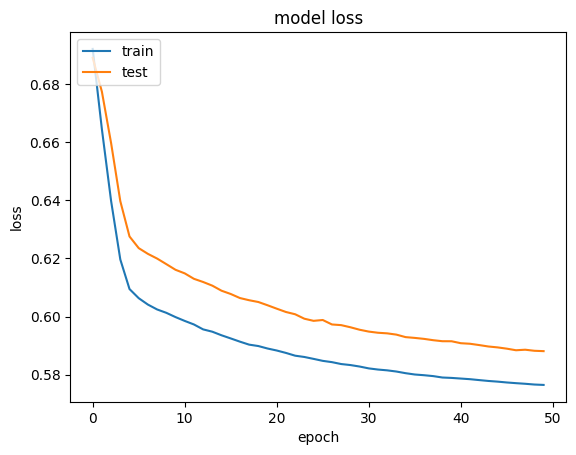

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Saving Model Weights

In this section, we save the weights of the trained collaborative filtering model to a file. Saving the model weights allows for later use, inference, or retraining without having to train the model from scratch.

In [29]:
model.save_weights("recommendation_model.weights.h5")

## Loading Model Weights

In this section, we load the previously saved weights of the collaborative filtering model. Loading the weights allows us to reuse a pre-trained model for making recommendations or further fine-tuning.

In [30]:
model.load_weights("recommendation_model.weights.h5")

## Generating Product Recommendations for a User

In this section, we generate product recommendations for a randomly selected user based on the collaborative filtering model's predictions. The recommendations are derived by considering products not previously rated by the user.

In [31]:
product_df = pd.read_csv('./drive/MyDrive/Datasets/product_details.csv')

# Let us get a user and see the top recommendations.
user_id = rating_df['user_id'].sample(1).iloc[0]
products_rated_by_user = rating_df[rating_df['user_id'] == user_id]
products_not_rated = product_df[~product_df["product_id"].isin(products_rated_by_user['product_id'].values)]["product_id"]
products_not_rated = list(set(products_not_rated).intersection(set(product2product_encoded.keys())))
products_not_rated = [[product2product_encoded.get(x)] for x in products_not_rated]
user_encoder = user2user_encoded.get(user_id)
user_product_array = np.hstack(([[user_encoder]] * len(products_not_rated), products_not_rated))
ratings = model.predict(user_product_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_product_ids = [product_encoded2product.get(products_not_rated[x][0]) for x in top_ratings_indices]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Products with high ratings from user")
print("——" * 8)
top_products_user = (products_rated_by_user.sort_values(by="rating", ascending=False).head(5)['product_id'].values)
product_df_rows = product_df[product_df["product_id"].isin(top_products_user)]
for row in product_df_rows.itertuples():
    print(row.product_name, ":", row.category_1)

print("——" * 8)
print("Top 10 product recommendations")
print("——" * 8)
recommended_products = product_df[product_df["product_id"].isin(recommended_product_ids)]
for row in recommended_products.itertuples():
    print(row.product_name, ":", row.category_1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Showing recommendations for user: AGQVKQZEHDMHVKFJPOKCEL2AXYAQ
Products with high ratings from user
————————————————
Portronics Konnect L 20W PD Quick Charge Type-C to 8-Pin USB Mobile Charging Cable, 1.2M, Tangle Resistant, Fast Data Sync(Grey) : Computers & Accessories
ZEBRONICS ZEB-USB150WF1 WiFi USB Mini Adapter Supports 150 Mbps Wireless Data, Comes with Advanced Security WPA/WPA2 encryption Standards : Computers & Accessories
Noise ColorFit Pro 4 Alpha Bluetooth Calling Smart Watch with 1.78 AMOLED Display, Tru Sync, 60hz Refresh Rate, instacharge, Gesture Control, Functional 360 Digital Crown (Jet Black) : Electronics
Cookwell Bullet Mixer Grinder (5 Jars, 3 Blades, Silver) : Home & Kitchen
Aquaguard Aura RO+UV+UF+Taste Adjuster(MTDS) with Active Copper & Zinc 7L water purifier,8 stages of purification,suitable for borewell,tanker,municipal water(Black) from Eureka Forbes : Home & Kitchen
————————————————
Top 10 product recommendations
————